<a href="https://colab.research.google.com/github/Rohit-Saswadkar/Font-Text-classification-project-using-CNN/blob/main/2%5D_Font_Detection_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Font detection system using CNN and Open Cv

Technologies used -
* Open cv - to image processing and text extraction
* easy ocr - to detect texts and regions
* Matplotlib -  to show the image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install easyocr
!pip install tensorflow

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

* 1] Load image path
* 2] Load pre-trained model

In [ ]:
# Define paths to your image and font recognition model

image_path = r"/content/drive/MyDrive/Data Science Advanced Projects/1 Data Science Advanced/Deep learning/Font recognition assessment/Happy_Republic_Day_wishes-2024-01-08-1704705260.jpg"
font_model_path = r"/content/drive/MyDrive/Data Science Advanced Projects/1 Data Science Advanced/Deep learning/Font recognition assessment/Model file/Model H5 file .h5" # Replace with your model path

2] Image reading
* Reading the images using opencv
* Used Optical Character Recognition (easy OCR) to detect and extract texts from image and create text bounding boxes

In [ ]:
# read image
img = cv2.imread(image_path) # read image

# EasyOCR used for text detection
reader = easyocr.Reader(['en'], gpu=False)
text_ = reader.readtext(img)

# performing text detection using EasyOCR to extract bounding boxes, texts, and confidence scores.
threshold = 0.4

print("Texts extracted with regions and score-",text_)

Texts extracted with regions and score- [([[0, 0], [289, 0], [289, 128], [0, 128]], 'Happu', 0.6476213598172997), ([[7, 109], [731, 109], [731, 217], [7, 217]], 'REPUBLC DAY', 0.882370778891861), ([[10, 228], [536, 228], [536, 279], [10, 279]], 'May the tricolor flag always fly high,', 0.9018333692409054), ([[8, 272], [540, 272], [540, 325], [8, 325]], 'symbolizing the unity, diversity, and', 0.7809773706502012), ([[9, 324], [416, 324], [416, 373], [9, 373]], 'strength of our great nation', 0.8462994061940128), ([[3, 368], [330, 368], [330, 447], [3, 447]], '26th January', 0.6785198152299293)]


3] Data preprocessing
* Converted color image to grey scale using open cv
* Resizing the image to 64 x 64 using open cv
* Normalizing the values of the image in the range of 0 to 255.

In [ ]:
def preprocess_image(image_patch):
    # convert to grayscale (if your model expects grayscale)
    gray_patch = cv2.cvtColor(image_patch, cv2.COLOR_BGR2GRAY)

    # resize the image patch to a fixed size expected by your model (e.g., 28x28 pixels)
    resized_patch = cv2.resize(gray_patch, (64 , 64))  # Assuming your model expects 32x32

    #normalize pixel values (e.g., convert to range 0-1 or -1 to 1)
    normalized_patch = resized_patch / 255.0

    return normalized_patch

3] created a image font prediction function using my model
* it get input as image patch , model and classes of the dataset model trained on and returns the class of detected font

In [ ]:
def predict_font(image_patch, font_model, classes):
    preprocessed_patch = preprocess_image(image_patch)
    predicted_font = font_model.predict(np.expand_dims(preprocessed_patch, axis=0)) # ------------------- our model for font prediction
    predicted_font_index = np.argmax(predicted_font)
    predicted_font_name = classes[predicted_font_index]
    return predicted_font_name

In [ ]:
# Usde to avoid errors while loading
try:
  font_model = load_model(font_model_path)
except OSError as e:
  print("Error loading font model:", e)
  exit()  # Exit if model loading fails

4] Loop to extract the texts with region box and confidence score from image to Image show with text regions and font classification

* This extracts the each box with its text and confidence score
* If confidence score > 0.4 then it shows the text else not.
* The line 1) creates text regions on the image using open cv
* Theline 2) shows the extracted texts with predicted font on the image using open cv
* Finally this line 3) shows the image in colors

1/1 [==============================] - 0s 23ms/step


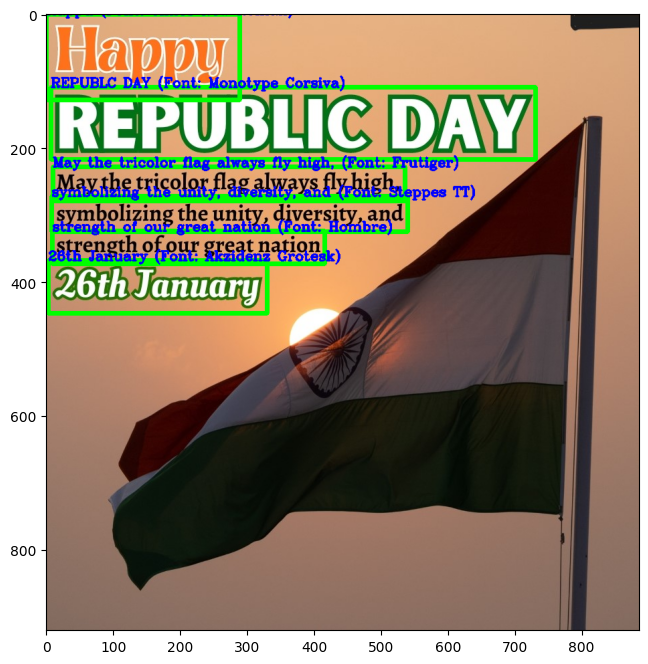

In [ ]:
#draw bbox, text, and predicted font
for t_, t in enumerate(text_):
    bbox, text, score = t
    classes = ['Agency', 'Akzidenz Grotesk', 'Algerian', 'Arial', 'Baskerville', 'Bell MT', 'Bembo', 'Bodoni', 'Book Antiqua', 'Brandish', 'Calibry', 'Californian FB', 'Calligraphy', 'Calvin', 'Cambria', 'Candara', 'Century', 'Comic Sans MS', 'Consolas', 'Corbel', 'Courier', 'Didot', 'Elephant', 'Fascinate', 'Franklin Gothic', 'Frutiger', 'Futura', 'Garamond', 'Georgia', 'Gill sans', 'Helvetica', 'Hombre', 'LCD Mono', 'Lucida Bright', 'Minion', 'Monotype Corsiva', 'Mrs Eaves', 'Myriad', 'Nasalization', 'News Gothic', 'Palatino linotype', 'Perpetua', 'Rockwell', 'Sabon', 'Snowdrift Regular', 'Steppes TT', 'Times New Roman', 'Verdana']
    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5) # --------------------------------------------- 1) to show region bounded texts

        # Extract text patch for font recognition
        text_patch = img[bbox[0][1]:bbox[2][1], bbox[0][0]:bbox[2][0]]

        # Predict font using your model
        predicted_font = predict_font(text_patch, font_model, classes)  # ----------extracted text patch, model and classes are forword to prediction function and it detects
        # the exact font and returns its class

        # Display text and predicted font
        font_text = f"{text} (Font: {predicted_font})"
        cv2.putText(img, font_text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2) # --------------2) to show texts and predicted font

# Display the image with text regions and predicted fonts
plt.figure( figsize = (8 , 8)) # ------------- enlarged the image size
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))  # --------------------------------------------------------3) shows the image in color
plt.show()


##Conclusion -


* The model shows errors in detecting the exact fonts. For each same font line it recognizes different fonts shows overfitting issue.
* To solve this I have to find more solutions with refining the model

  


  Solutions -
* I reduced the image size during training from 256 to 64 to reduce load on laptop, could be a possible reason behind this.
* Improvong the convolutional layers and features can also increase the accuracy
* Vanishing Gradients could be also a posible reason, so weights adjustments can help to avoid.
* dropout neurons can be a possible solution.